### Different type of data:

##### Cross sectional data
 - Obervation taken in different point of time, cross-sectional data represents a snapshot at a given instance of time.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data Files/WDI_csv/WDIData.csv')

In [3]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')


In [4]:
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (422136, 64)


In [6]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1599


In [7]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 64)
Shape of military_exp: (264, 64)


In [10]:
central_govt_debt['2010'].describe()

count     60.000000
mean      51.484739
std       31.131256
min        6.385576
25%       27.632094
50%       48.442052
75%       65.764737
max      162.296407
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    193.000000
mean       1.954996
std        1.305419
min        0.000000
25%        1.169691
50%        1.563666
75%        2.594058
max        8.565677
Name: 2010, dtype: float64

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [14]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [16]:
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.945837
AGO,NaN,4.177585
ALB,NaN,1.558592
ARB,NaN,5.040500
ARE,NaN,6.038592
ARG,NaN,0.814878
ARM,NaN,4.265646
AUS,29.257361,1.862400
AUT,NaN,0.821233
AZE,6.385576,2.791004


In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.shape

(48, 2)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Military expenditure (% of GDP) of 48 countries in 2010')

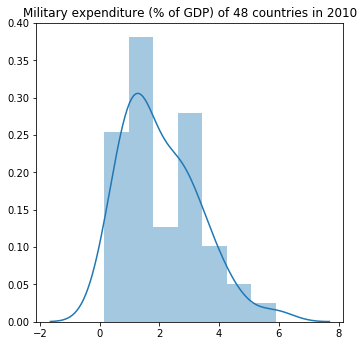

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of '+ str(data_to_plot.shape[0]) + ' countries in 2010')

Text(0.5,1,'Military expenditure (% of GDP) of 48 countries in 2010')

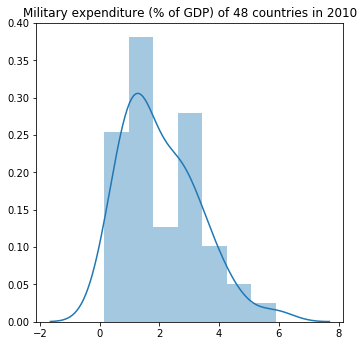

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=True)
g.set_title('Military expenditure (% of GDP) of '+ str(data_to_plot.shape[0]) + ' countries in 2010')

Text(0.5,1,'Military expenditures & Debt of central governments in 2010')

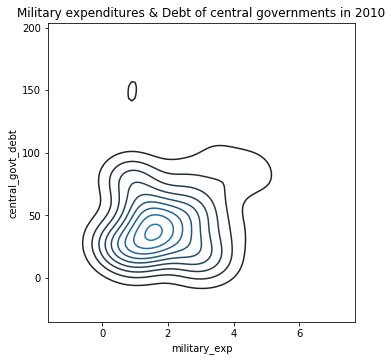

In [21]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')

##### Time Series data: 
 - Quantitative observations on one or more measurable characteristics of an individual entity and taken at multiple points in time.
 - Typically characterized by several interesting internal structures such as trend, seasonality, stationarity, autocorrelation. 

In [22]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [23]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [24]:
data_us.shape

(64, 2)

In [25]:
np.where(data_us.index=='1960')[0][0]

4

In [26]:
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]

In [27]:
data_us = data_us.iloc[index0:index1+1,:]

In [28]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [29]:
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.61959,NaN
1961,8.77573,NaN
1962,8.94408,NaN
1963,8.46506,NaN
1964,7.71687,NaN


In [30]:
data_us.shape

(51, 2)

In [31]:
data_us.tail(5)

,Federal Military Expenditure,Debt of Federal Government
2006,3.81958,55.4711
2007,3.85391,55.746
2008,4.22169,64.0622
2009,4.6271,76.1779
2010,4.657,85.4643


In [32]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 2)


In [33]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head(5)

,Federal Military Expenditure,Debt of Federal Government
1989,5.54685,39.1284
1990,5.27832,40.9339
1991,4.57218,44.0616
1992,4.66626,46.0501
1993,4.32694,48.2461


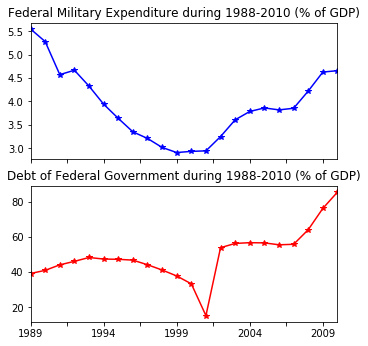

In [34]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

##### Panel data:
 - Observe multiple entities over multiple points in time we get a panel data also known as longitudinal data. 

In [35]:
def subset_col(data, country_code, index0, index1):
    country_data = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') &\
                   (data['Country Code']== country_code)]
    country_data = country_data.iloc[:, index0:index1+1]
    country_data = pd.Series(data=country_data.values[0], index=country_data.columns)
    country_data.dropna(inplace=True)
    return country_data

In [36]:
chn = subset_col(data, 'CHN', index0, index1)
usa = subset_col(data, 'USA', index0, index1)
ind = subset_col(data, 'IND', index0, index1)
gbr = subset_col(data, 'GBR', index0, index1)

Text(0.5,0,'Years')

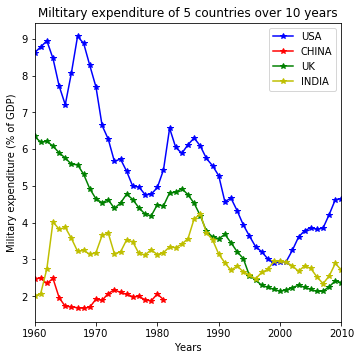

In [37]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')